# A Sentiment Analysis of Yelp Reviews
## Author: Robert Surridge

### 1. Import necessary packages:

In [259]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rsurridge/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 2. Load the dataset with a sample of 10000 Yelp reviews, explore the metadata, and add a column "length" that contains the number of words per review:

In [260]:
yelp_data = pd.read_json('/Users/rsurridge/Downloads/yelp_data/yelp_academic_dataset_review.json', 
                         lines=True, chunksize=10000)
for chunk in yelp_data:
    yelp_sample = chunk
    result = chunk.to_json(orient="records")
    with open("yelp_sample.json", "w") as f:
        json.dump(result, f)
    break

yelp_sample['length'] = yelp_sample['text'].apply(len)
yelp_sample['stars'] = yelp_sample['stars'].astype(float)

print()
print("Shape of the dataset:", yelp_sample.shape)

print()
print("Column names:", yelp_sample.columns)

print()
print("Datatype of each column:")
print(yelp_sample.dtypes)

print()
print("A few dataset entries:")
print(yelp_sample.head())

print()
print("Dataset Summary:")
yelp_sample.describe(include='all')



Shape of the dataset: (10000, 10)

Column names: Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date', 'length'],
      dtype='object')

Datatype of each column:
review_id              object
user_id                object
business_id            object
stars                 float64
useful                  int64
funny                   int64
cool                    int64
text                   object
date           datetime64[ns]
length                  int64
dtype: object

A few dataset entries:
                review_id                 user_id             business_id   
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw  \
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJ

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,length
count,10000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000.000000
unique,10000,9472,3930,NaN,NaN,NaN,NaN,10000,NaN,NaN
top,KU_O5udG6zpxOg-VcAEodg,n-lBS02-3yvlY5Q91mmwDA,GBTPC53ZrG1ZBY3DT8Mbcw,NaN,NaN,NaN,NaN,"If you decide to eat here, just be aware it is...",NaN,NaN
freq,1,6,85,NaN,NaN,NaN,NaN,1,NaN,NaN
mean,NaN,NaN,NaN,3.854300,0.889100,0.246500,0.335500,NaN,2015-04-17 08:27:40.820000,549.039100
min,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,2005-03-01 17:47:15,26.000000
25%,NaN,NaN,NaN,3.000000,0.000000,0.000000,0.000000,NaN,2013-11-14 11:16:35.500000,224.000000
50%,NaN,NaN,NaN,4.000000,0.000000,0.000000,0.000000,NaN,2015-09-09 23:20:24,395.000000
75%,NaN,NaN,NaN,5.000000,1.000000,0.000000,0.000000,NaN,2017-03-27 02:25:32.500000,694.250000
max,NaN,NaN,NaN,5.000000,91.000000,26.000000,44.000000,NaN,2018-10-04 18:22:35,4994.000000


### 3. Plot histograms of review length frenquencies by the star rating:

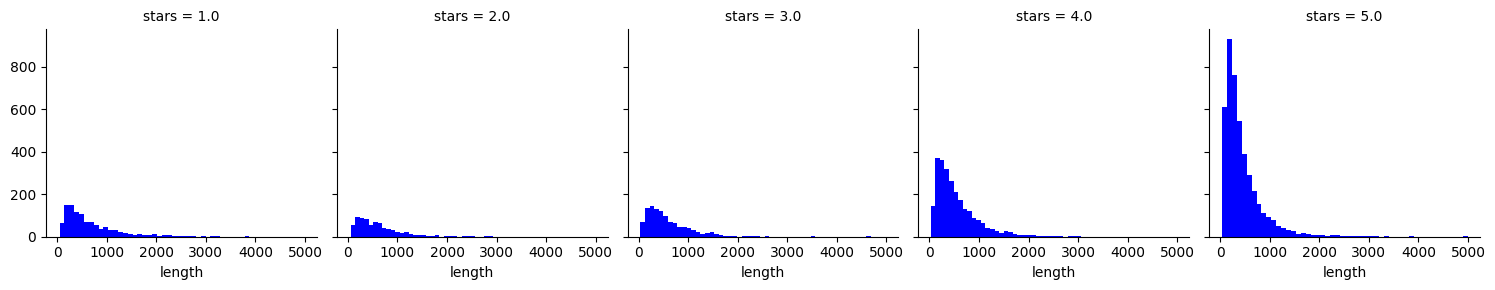

In [261]:
graph = sns.FacetGrid(data=yelp_sample, col='stars')
graph.map(plt.hist, 'length', bins=50, color='blue')

### 4. Compare the star rating to the review voting types (useful, funny, and cool) and analyze the correlation between the three review voting types:

In [262]:
yelp_groupby = yelp_sample.loc[:, ['stars', 'useful', 'funny', 'cool', 'length']]
star_vote = yelp_groupby.groupby(by='stars').mean()
count = yelp_sample['stars'].value_counts().sort_index(ascending=False)

print()
print("Star rating by review voting types:")
print(star_vote)

print()
print("Correlation between review voting types:")
print(star_vote.corr())

print()
print("Star count")
print(count)


Star rating by review voting types:
         useful     funny      cool      length
stars                                          
1.0    1.446710  0.464319  0.156627  703.558851
2.0    1.022280  0.353866  0.180865  670.399738
3.0    0.791923  0.279192  0.293240  625.901668
4.0    0.836053  0.242813  0.425019  566.729215
5.0    0.786502  0.168954  0.364454  460.758830

Correlation between review voting types:
          useful     funny      cool    length
useful  1.000000  0.924108 -0.784997  0.730113
funny   0.924108  1.000000 -0.870575  0.935341
cool   -0.784997 -0.870575  1.000000 -0.816388
length  0.730113  0.935341 -0.816388  1.000000

Star count
stars
5.0    4445
4.0    2574
3.0    1139
2.0     763
1.0    1079
Name: count, dtype: int64


We want to note here that our sample dataset is biased to more positive reviews than negative reviews. As a result, we should proceed with caution when classifying, training, and predicting with this dataset.

### 5. Classify the reviews into 1-star (negative), 3-star (neutral), and 5-star (positive) classes and separate the dataset into X and Y subsets for prediction:

In [263]:
yelp_classify = yelp_sample.loc[:, ['stars', 'text']]
data_classes = yelp_classify[(yelp_classify['stars']==1) | 
                           (yelp_classify['stars']==3) | 
                           (yelp_classify['stars']==5)]

print()
print("Shape of the dataset:", data_classes.shape)

x = data_classes['text']
y = data_classes['stars']

print()
print("A few X entries")
print(x.head())

print()
print("A few Y entries")
print(y.head())


Shape of the dataset: (6663, 2)

A few X entries
0    If you decide to eat here, just be aware it is...
1    I've taken a lot of spin classes over the year...
2    Family diner. Had the buffet. Eclectic assortm...
3    Wow!  Yummy, different,  delicious.   Our favo...
5    I am a long term frequent customer of this est...
Name: text, dtype: object

A few Y entries
0    3.0
1    5.0
2    3.0
3    5.0
5    1.0
Name: stars, dtype: float64


### 6. Clean the review text by removing stopwords and punctuation:

In [264]:
def process_text(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

### 7. Convert processed reviews into vectors:

In [265]:
vocab = CountVectorizer(analyzer=process_text).fit(x)
r1 = x[1]
vocab1 = vocab.transform([r1])

print()
print("Number of possible words:", len(vocab.vocabulary_))

print()
print("Sample Uncleaned Review:")
print(r1)

print()
print("Vectorized Review:")
print(vocab1)

print()
print("Return word from index 5000:", vocab.get_feature_names_out()[5000])
print("Return word from index 20000:", vocab.get_feature_names_out()[20000])


Number of possible words: 27678

Sample Uncleaned Review:
I've taken a lot of spin classes over the years, and nothing compares to the classes at Body Cycle. From the nice, clean space and amazing bikes, to the welcoming and motivating instructors, every class is a top notch work out.

For anyone who struggles to fit workouts in, the online scheduling system makes it easy to plan ahead (and there's no need to line up way in advanced like many gyms make you do).

There is no way I can write this review without giving Russell, the owner of Body Cycle, a shout out. Russell's passion for fitness and cycling is so evident, as is his desire for all of his clients to succeed. He is always dropping in to classes to check in/provide encouragement, and is open to ideas and recommendations from anyone. Russell always wears a smile on his face, even when he's kicking your butt in class!

Vectorized Review:
  (0, 1658)	2
  (0, 2766)	2
  (0, 4663)	1
  (0, 7464)	2
  (0, 7465)	1
  (0, 9730)	1
  (0, 9

### 8. Vectorize all reviews and split processed dataset into training and testing sets:

In [266]:
x = vocab.transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

### 9. Modeling with Multinomial Naive Bayes (since we're working with sparse data, we cannot rely on the Gaussian Naive Bayes assumptions):

In [267]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
predmnb = mnb.predict(x_test)

print()
print("Score:", round(accuracy_score(y_test, predmnb) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test, predmnb))


Score: 81.25

Classification Report:
              precision    recall  f1-score   support

         1.0       0.73      0.70      0.72       202
         3.0       0.60      0.36      0.45       227
         5.0       0.86      0.95      0.90       904

    accuracy                           0.81      1333
   macro avg       0.73      0.67      0.69      1333
weighted avg       0.79      0.81      0.80      1333



### 10. Modeling with Random Forest Classifier:

In [268]:
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(x_train, y_train)
predrmfr = rmfr.predict(x_test)

print()
print("Score:", round(accuracy_score(y_test, predrmfr) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test, predrmfr))


Score: 77.94

Classification Report:
              precision    recall  f1-score   support

         1.0       0.92      0.54      0.68       202
         3.0       0.74      0.16      0.27       227
         5.0       0.77      0.99      0.86       904

    accuracy                           0.78      1333
   macro avg       0.81      0.56      0.60      1333
weighted avg       0.79      0.78      0.73      1333



### 11. Modeling with the Decision Tree Classifier:

In [269]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)

print()
print("Score:",round(accuracy_score(y_test, preddt) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test, preddt))


Score: 72.17

Classification Report:
              precision    recall  f1-score   support

         1.0       0.59      0.59      0.59       202
         3.0       0.40      0.39      0.40       227
         5.0       0.83      0.83      0.83       904

    accuracy                           0.72      1333
   macro avg       0.61      0.61      0.61      1333
weighted avg       0.72      0.72      0.72      1333



From the above models, we can compare the accuracy scores:
* Multinomial Naive Bayes: 81.25
* Random Forest Classifier: 77.04
* Decision Tree Classifier: 72.54

Since the Multinomial Naive Bayes makes the most accurate prediction, let's use it to predict a sample positive, a sample neutral, and a sample negative review:

### 12. Classify a positive review:

In [270]:
pos_rev = yelp_sample['text'][1]
pos_rev_trans = vocab.transform([pos_rev])

print()
print("Sample positive review:")
print(pos_rev)

print()
print("Actual Rating: ", yelp_sample['stars'][1])
print("Predicted Rating:", mnb.predict(pos_rev_trans)[0])



Sample positive review:
I've taken a lot of spin classes over the years, and nothing compares to the classes at Body Cycle. From the nice, clean space and amazing bikes, to the welcoming and motivating instructors, every class is a top notch work out.

For anyone who struggles to fit workouts in, the online scheduling system makes it easy to plan ahead (and there's no need to line up way in advanced like many gyms make you do).

There is no way I can write this review without giving Russell, the owner of Body Cycle, a shout out. Russell's passion for fitness and cycling is so evident, as is his desire for all of his clients to succeed. He is always dropping in to classes to check in/provide encouragement, and is open to ideas and recommendations from anyone. Russell always wears a smile on his face, even when he's kicking your butt in class!

Actual Rating:  5.0
Predicted Rating: 5.0


### 13. Classify a neutral review:

In [271]:
neut_rev = yelp_sample['text'][8]
neut_rev_trans = vocab.transform([neut_rev])

print()
print("Sample neutral review:")
print(neut_rev)

print()
print("Actual Rating: ", yelp_sample['stars'][8])
print("Predicted Rating:", mnb.predict(neut_rev_trans)[0])


Sample neutral review:
This easter instead of going to Lopez Lake we went to Los Padres National Forest which is really pretty but if you go to white rock the staff needs to cut down all the dead grass that invades the rock and the water. I would wish the staff would also clean or get rid of the dead grass that's also living by the water. The water is really green and dirty. Los padres national forest staff need to work hard to maintain this forest looking pretty and not like a dumpster. Even Cachuma lake looks like they put a bit more effort.

Actual Rating:  3.0
Predicted Rating: 3.0


### 14. Classify a negative review:

In [272]:
neg_rev = yelp_sample['text'][5]
neg_rev_trans = vocab.transform([neg_rev])

print()
print("Sample negative review:")
print(neg_rev)

print()
print("Actual Rating: ", yelp_sample['stars'][5])
print("Predicted Rating:", mnb.predict(neg_rev_trans)[0])



Sample negative review:
I am a long term frequent customer of this establishment. I just went in to order take out (3 apps) and was told they're too busy to do it. Really? The place is maybe half full at best. Does your dick reach your ass? Yes? Go fuck yourself! I'm a frequent customer AND great tipper. Glad that Kanella just opened. NEVER going back to dmitris!

Actual Rating:  1.0
Predicted Rating: 1.0
